In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()

In [3]:
for dirpath, dirs, files in os.walk("C:\\Users\\cadea\\OneDrive\\Desktop\\CID Data Processing\\10bar_isooctane_0p5_phi\\Dataframe Data"):
    for filename in files:
        new_df = pd.read_csv(dirpath + "\\" + filename) #can include index_column=0 if you don't want the new index
        df = pd.concat([df,new_df])
df = df.reset_index(drop=True)

In [4]:
df

,Inj Num,Pressure(Bar),Phi,Fuel Type,Chamber Air Temp,Inj Press,DOI,Chamber Press,Period,Wall Temp,Time
0,0,9.920528,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.00
1,0,10.204670,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.02
2,0,10.140638,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.04
3,0,10.204670,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.06
4,0,10.124630,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.08
...,...,...,...,...,...,...,...,...,...,...,...
1059995,8,14.083114,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.90
1059996,8,14.043094,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.92
1059997,8,14.035090,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.94
1059998,8,14.015080,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.96


In [5]:
my_data = df['Pressure(Bar)'].to_numpy()
my_time = df['Time'].to_numpy()

In [10]:
array = [df['Chamber Air Temp'],df['Inj Num']]

index = pd.MultiIndex.from_arrays(array, names=['Air Temp', 'Inj'])

# Fix: Combine my_data and my_time into a 2D array
data = {'Pressure(Bar)': my_data, 'Time(s)': my_time}
df_pt = pd.DataFrame(data, index=index)
df_pt

Pressure(Bar)  Time(s)
Air Temp Inj                        
1000     0         9.920528     0.00
         0        10.204670     0.02
         0        10.140638     0.04
         0        10.204670     0.06
         0        10.124630     0.08
...                     ...      ...
950      8        14.083114   199.90
         8        14.043094   199.92
         8        14.035090   199.94
         8        14.015080   199.96
         8        14.075110   199.98

[1060000 rows x 2 columns]

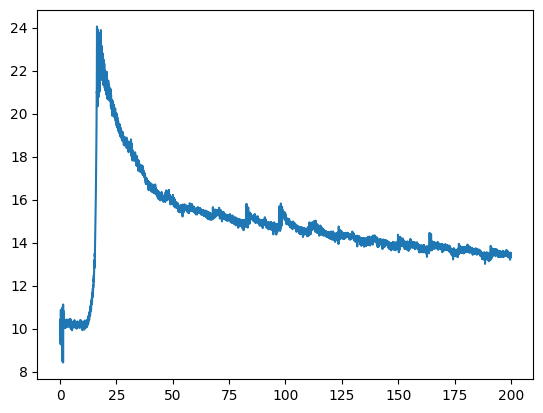

In [ ]:
# Change this variable to desired Air Temp
AirTemp = 1000 
InjNum = 0

subset = df_pt.xs((AirTemp, InjNum), level=('Air Temp', 'Inj'))
plt.plot(subset['Time(s)'], subset['Pressure(Bar)'], label=f'Air Temp: {AirTemp}, Inj Num: {InjNum}')

Text(0.5, 1.0, 'Pressure vs Time for Air Temp: 1000')

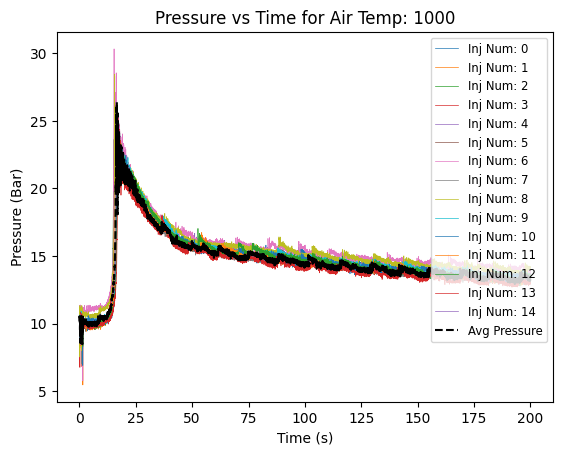

In [ ]:
for inj_num in df['Inj Num'].unique():
    subset = df_pt.xs((AirTemp, inj_num), level=('Air Temp', 'Inj'))
    plt.plot(subset['Time(s)'], subset['Pressure(Bar)'], label=f'Inj Num: {inj_num}', linewidth=0.5)
# give me an array for average preessure at each time step for each inj num
avg_pressure = subset.groupby('Time(s)')['Pressure(Bar)'].mean()
# plot the average pressure for each inj num
plt.plot(avg_pressure.index, avg_pressure.values, label='Avg Pressure', linestyle='--', linewidth=1.5, color='black')
plt.legend(loc = 'upper right', fontsize='small')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Bar)')
plt.title(f'Pressure vs Time for Air Temp: {AirTemp}')

